In [1]:
import numpy as np
from sklearn.datasets import make_blobs

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier

from sklearn.model_selection import train_test_split, cross_val_score

from matplotlib import pyplot as plt
import plotly.express as px
import tqdm

In [2]:
my_random_state = 12345

In [3]:
X, y = make_blobs(n_samples=500,
                  centers=2,
                  random_state = my_random_state,
                  cluster_std=8
                  )

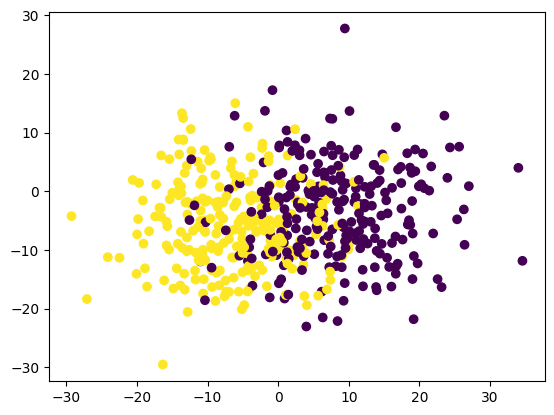

In [4]:
plt.scatter(X[:,0], X[:,1], c = y)

In [5]:
X_train, X_test, y_train , y_test = train_test_split(X,
                                                     y,
                                                     stratify = y,
                                                     random_state=my_random_state)

# stratify = сохранение пропорций классов в обучающей и тестовой выборках

In [29]:
np.mean(y), np.mean(y_train), np.mean(y_test)

(0.5, 0.5013333333333333, 0.496)

# Построим максимальное дерево

In [30]:
DecisionTreeClassifier?

Init signature:
DecisionTreeClassifier(
    *,
    criterion='gini',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    class_weight=None,
    ccp_alpha=0.0,
    monotonic_cst=None,
)
Docstring:     
A decision tree classifier.

Read more in the :ref:`User Guide <tree>`.

Parameters
----------
criterion : {"gini", "entropy", "log_loss"}, default="gini"
    The function to measure the quality of a split. Supported criteria are
    "gini" for the Gini impurity and "log_loss" and "entropy" both for the
    Shannon information gain, see :ref:`tree_mathematical_formulation`.

splitter : {"best", "random"}, default="best"
    The strategy used to choose the split at each node. Supported
    strategies are "best" to choose the best split and "random" to choose
    the best random split.

max_depth : int, default=None

In [31]:
maxtree = DecisionTreeClassifier(random_state=my_random_state,
                                 max_depth=None)

In [9]:
maxtree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=12345)

In [10]:
maxtree.score(X_train, y_train), maxtree.score(X_test, y_test)

(1.0, 0.776)

# Бэггинг

In [32]:
BaggingClassifier?
# estimator=None == DecisionTreeClassifier

Init signature:
BaggingClassifier(
    estimator=None,
    n_estimators=10,
    *,
    max_samples=1.0,
    max_features=1.0,
    bootstrap=True,
    bootstrap_features=False,
    oob_score=False,
    warm_start=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
)
Docstring:     
A Bagging classifier.

A Bagging classifier is an ensemble meta-estimator that fits base
classifiers each on random subsets of the original dataset and then
aggregate their individual predictions (either by voting or by averaging)
to form a final prediction. Such a meta-estimator can typically be used as
a way to reduce the variance of a black-box estimator (e.g., a decision
tree), by introducing randomization into its construction procedure and
then making an ensemble out of it.

This algorithm encompasses several works from the literature. When random
subsets of the dataset are drawn as random subsets of the samples, then
this algorithm is known as Pasting [1]_. If samples are drawn with
replaceme

In [39]:
bag = BaggingClassifier(estimator=maxtree,
                        n_estimators=100,
                        random_state=my_random_state,
                        max_samples=0.3,
                        n_jobs=-1)

In [40]:
bag.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(random_state=12345),
                  max_samples=0.3, n_estimators=100, n_jobs=-1,
                  random_state=12345)

In [41]:
bag.score(X_train, y_train), bag.score(X_test, y_test)

(0.8693333333333333, 0.856)

# Random Forest

In [42]:
RandomForestClassifier?

Init signature:
RandomForestClassifier(
    n_estimators=100,
    *,
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='sqrt',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    class_weight=None,
    ccp_alpha=0.0,
    max_samples=None,
    monotonic_cst=None,
)
Docstring:     
A random forest classifier.

A random forest is a meta estimator that fits a number of decision tree
classifiers on various sub-samples of the dataset and uses averaging to
improve the predictive accuracy and control over-fitting.
Trees in the forest use the best split strategy, i.e. equivalent to passing
`splitter="best"` to the underlying :class:`~sklearn.tree.DecisionTreeClassifier`.
The sub-sample size is controlled with the `max_samples` parameter if
`bootstrap=True` (default), otherwise the

In [43]:
rf = RandomForestClassifier(n_estimators=100,
                            random_state=my_random_state,
                            max_samples=0.3,
                            n_jobs=-1)

In [44]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_samples=0.3, n_jobs=-1, random_state=12345)

In [45]:
rf.score(X_train, y_train), rf.score(X_test, y_test)

(0.8693333333333333, 0.848)

In [46]:
tqdm.tqdm?

Init signature: tqdm.tqdm(*_, **__)
Docstring:     
Decorate an iterable object, returning an iterator which acts exactly
like the original iterable, but prints a dynamically updating
progressbar every time a value is requested.

Parameters
----------
iterable  : iterable, optional
    Iterable to decorate with a progressbar.
    Leave blank to manually manage the updates.
desc  : str, optional
    Prefix for the progressbar.
total  : int or float, optional
    The number of expected iterations. If unspecified,
    len(iterable) is used if possible. If float("inf") or as a last
    resort, only basic progress statistics are displayed
    (no ETA, no progressbar).
    If `gui` is True and this parameter needs subsequent updating,
    specify an initial arbitrary large positive number,
    e.g. 9e9.
leave  : bool, optional
    If [default: True], keeps all traces of the progressbar
    upon termination of iteration.
    If `None`, will leave only if `position` is `0`.
file  : `io.TextIOW

In [48]:
accuracy_dict = {}
for n in tqdm.tqdm(range(10, 150, 30), desc="Progress"):
  rf = RandomForestClassifier(n_estimators=n,
                              random_state=my_random_state,
                              max_samples=0.3,
                              n_jobs=-1)
  scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='accuracy')
  avg_accuracy = np.mean(scores)
  accuracy_dict[n] = avg_accuracy

Progress: 100%|██████████| 5/5 [00:10<00:00,  2.12s/it]


In [49]:
cross_val_score?

Signature:
cross_val_score(
    estimator,
    X,
    y=None,
    *,
    groups=None,
    scoring=None,
    cv=None,
    n_jobs=None,
    verbose=0,
    params=None,
    pre_dispatch='2*n_jobs',
    error_score=nan,
)
Docstring:
Evaluate a score by cross-validation.

Read more in the :ref:`User Guide <cross_validation>`.

Parameters
----------
estimator : estimator object implementing 'fit'
    The object to use to fit the data.

X : {array-like, sparse matrix} of shape (n_samples, n_features)
    The data to fit. Can be for example a list, or an array.

y : array-like of shape (n_samples,) or (n_samples, n_outputs),             default=None
    The target variable to try to predict in the case of
    supervised learning.

groups : array-like of shape (n_samples,), default=None
    Group labels for the samples used while splitting the dataset into
    train/test set. Only used in conjunction with a "Group" :term:`cv`
    instance (e.g., :class:`GroupKFold`).

    .. versionchanged:: 1.

In [50]:
accuracy_dict

{10: 0.7653333333333332,
 40: 0.784,
 70: 0.792,
 100: 0.7973333333333333,
 130: 0.7893333333333332}

In [51]:
px.line(x=accuracy_dict.keys(), y=accuracy_dict.values(), labels={'y':'Accuarcy','x':'number of trees' })

# Оптимальное дерево

In [52]:
DecisionTreeClassifier?

Init signature:
DecisionTreeClassifier(
    *,
    criterion='gini',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    class_weight=None,
    ccp_alpha=0.0,
    monotonic_cst=None,
)
Docstring:     
A decision tree classifier.

Read more in the :ref:`User Guide <tree>`.

Parameters
----------
criterion : {"gini", "entropy", "log_loss"}, default="gini"
    The function to measure the quality of a split. Supported criteria are
    "gini" for the Gini impurity and "log_loss" and "entropy" both for the
    Shannon information gain, see :ref:`tree_mathematical_formulation`.

splitter : {"best", "random"}, default="best"
    The strategy used to choose the split at each node. Supported
    strategies are "best" to choose the best split and "random" to choose
    the best random split.

max_depth : int, default=None

In [23]:
tree_params = {'criterion':['entropy', ],
               'max_depth':[5,7,10,15],
               'ccp_alpha':[0.01, 0.05, 0.1, 0.5, 1]}

In [24]:
best_accuracy = 0
for criterion in tree_params['criterion']:
  for max_depth in tree_params['max_depth']:
    for ccp_alpha in tree_params['ccp_alpha']:
      dtree = DecisionTreeClassifier(criterion=criterion,
                                     max_depth=max_depth,
                                     ccp_alpha=ccp_alpha,
                                     random_state=my_random_state,
                                     )
      scores = cross_val_score(dtree, X_train, y_train, cv=5, scoring='accuracy')
      avg_accuracy = np.mean(scores)
      if avg_accuracy>best_accuracy:
        best_accuracy = avg_accuracy
        best_params = {'criterion':criterion,
                        'max_depth':max_depth,
                        'ccp_alpha':ccp_alpha}

In [25]:
best_params

{'criterion': 'entropy', 'max_depth': 5, 'ccp_alpha': 0.05}

In [26]:
best_tree = DecisionTreeClassifier(**best_params)

In [27]:
best_tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.05, criterion='entropy', max_depth=5)

In [28]:
best_tree.score(X_train, y_train), best_tree.score(X_test, y_test)

(0.8266666666666667, 0.872)